# Лабораторная работы №3
## Проектирование цифрового фильтра и исследование его характеристик.
***

### 1. Подключение библиотек.

In [67]:
import numpy as np
import laba1, laba2
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

### 2. Получение реальной ЭКГ.

In [68]:
from scipy.misc import electrocardiogram
ECG = electrocardiogram()

### 3. Создание объектa рекурсивного фильтра.

In [69]:
class RecursiveFilter:
    def __init__(self, f_c):
        x = np.exp(-2*np.pi*f_c)
        self.a0 = (1 - x)**4
        self.b1 = 4 * x
        self.b2 = -6*x ** 2 
        self.b3 = 4*x ** 3
        self.b4 = -x ** 4
        
    def filter_(self, sig):
        sig_size = sig.x1.size
        y = np.zeros(sig_size)
        x = sig.y1

        for i in range(sig_size):
            y[i] = self.a0*x[i] + self.b1*y[i - 1] + self.b2*y[i - 2] + self.b3*y[i - 3] + self.b4*y[i - 4]  
        return laba2.Signal(y)

### 4. Изучение влияния скользящего усредняющего фильтра на зашумленный ECG.

In [70]:
ecg = laba1.Ecg(cycles=1)
white_noise = laba1.WhiteNoise(deviation=0.1, size=ecg.size())
harm_noise = laba1.HarmNoise(a_hn=0.1, f_d=5, f_hn=1110, n_sin=1888)

ecg_wn = laba1.SumSignal(ecg, white_noise)
ecg_hn = laba1.SumSignal(ecg, harm_noise)

* #### ECG

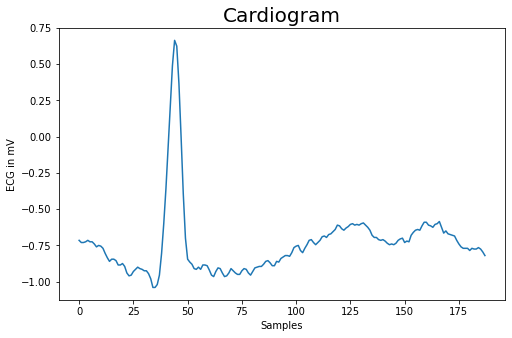

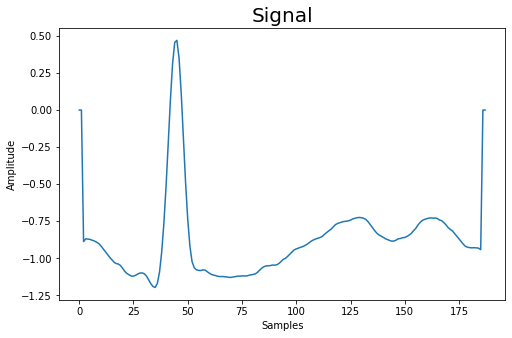

In [71]:
ecg.print_()
ecg_new = laba1.AveragingFilter(5).filter_(ecg)
ecg_new.print_()

* #### ECG, зашумленный White Noise 

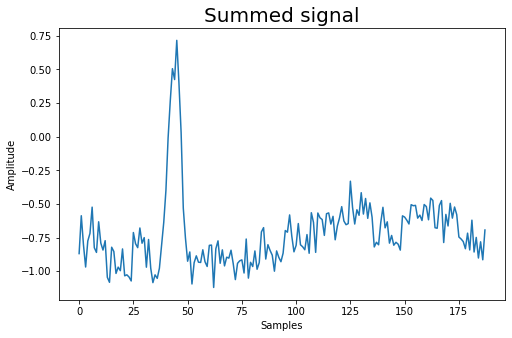

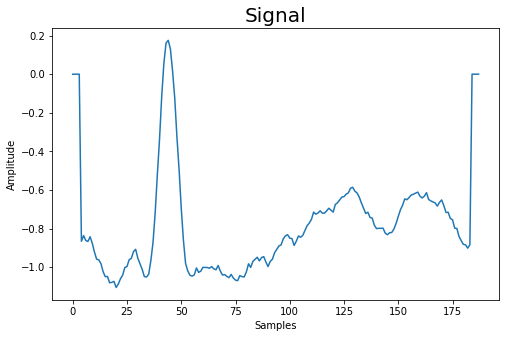

In [72]:
ecg_wn.print_()
ecg_wn_new = laba1.AveragingFilter(8).filter_(ecg_wn)
ecg_wn_new.print_()

* #### ECG, зашумленный Harm Noise 

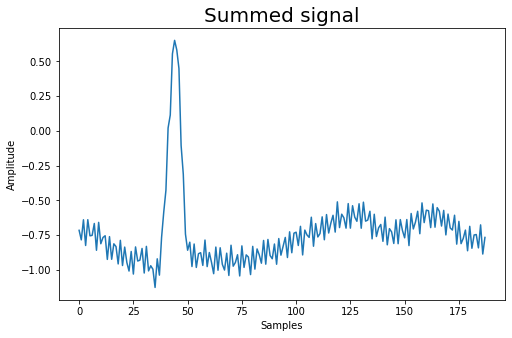

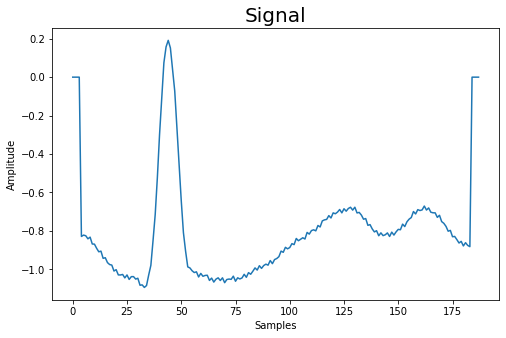

In [73]:
ecg_hn.print_()
ecg_hn_new = laba1.AveragingFilter(8).filter_(ecg_hn)
ecg_hn_new.print_()

### 5. Изучение влияния Sinc-фильтра на различные виды шумов.

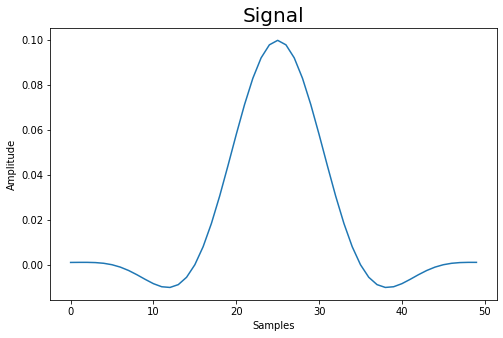

In [74]:
sinc = laba2.sinc_func(0.05, 50)
sinc.print_()

* #### ECG, зашумленный White Noise 

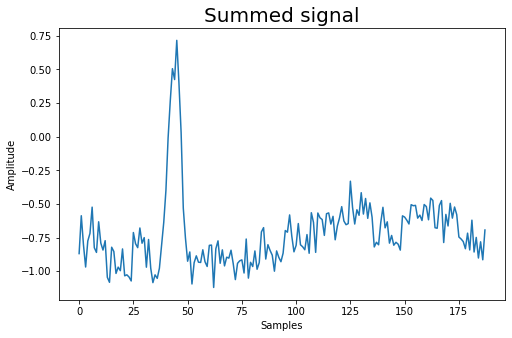

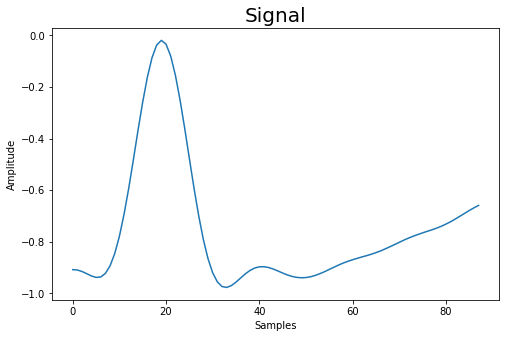

In [75]:
conv = laba1.Convolution(sinc).signals_convolution(ecg_wn)
ecg_wn.print_()
conv.print_()

* #### ECG, зашумленный Harm Noise 

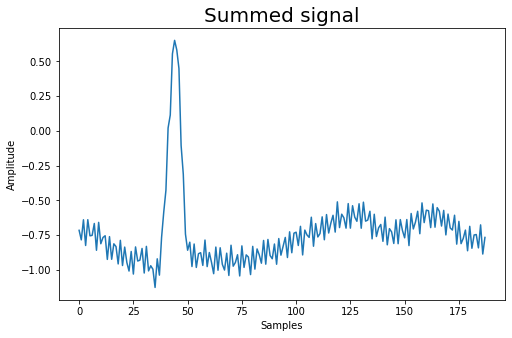

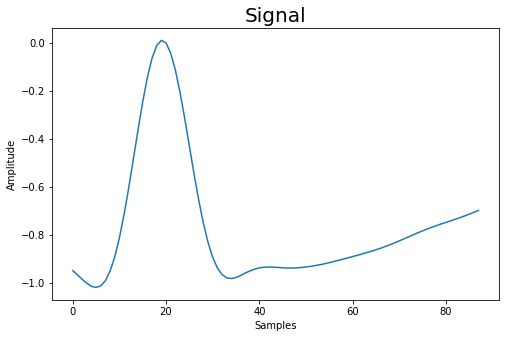

In [76]:
conv = laba1.Convolution(sinc).signals_convolution(ecg_hn)
ecg_hn.print_()
conv.print_()

### 6. Фильтрация сигнала с помощью рекурсивного фильтра.

* #### ECG, зашумленный White Noise

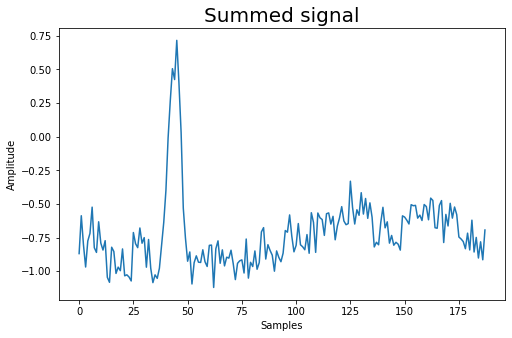

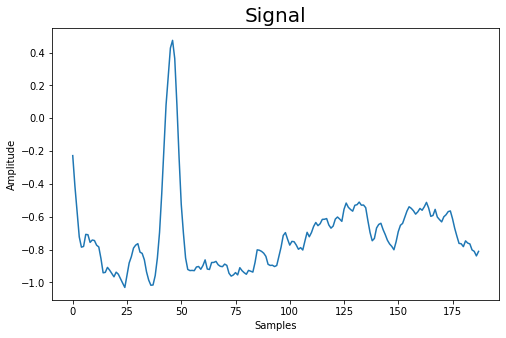

In [77]:
ecg_wn.print_()
ecg_wn_filtered = RecursiveFilter(0.2).filter_(ecg_wn)
ecg_wn_filtered.print_()

* #### ECG, зашумленный Harm Noise 

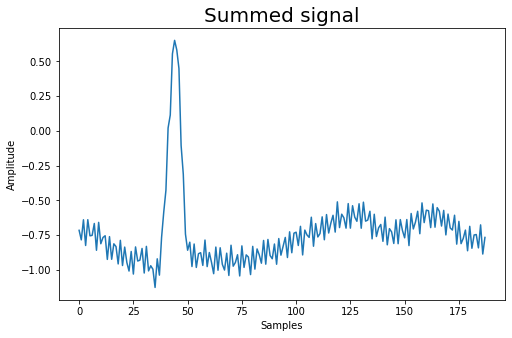

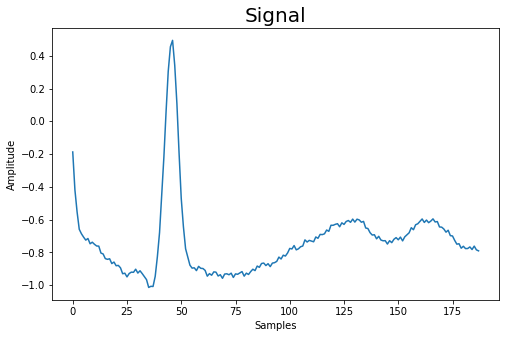

In [78]:
ecg_hn.print_()
ecg_hn_filtered = RecursiveFilter(0.2).filter_(ecg_hn)
ecg_hn_filtered.print_()

***
### Вывод: Изучили особенности реализации алгоритмов создания цифровых фильтров. Исследовали скользящий усредняющий фильтр, sinc-фильтр и рекурсивный фильтр НЧ.